1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [1]:
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
import scipy
from scipy.stats import norm
%matplotlib inline

-8.107449820858108 8.47629331499556


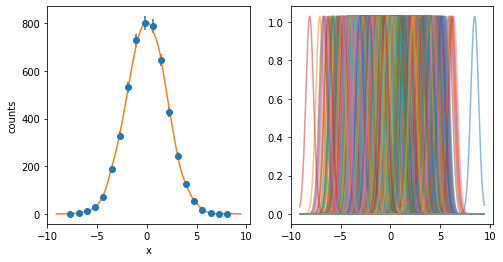

In [2]:
x = np.random.normal(0,2,5000)
counts,bin_edges = np.histogram(x,20)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
err = np.random.rand(bin_centres.size)*100

fig, (fig1, fig2)= plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
fig1.errorbar(bin_centres, counts, yerr=np.sqrt(counts), fmt='o', label= ('x', 'counts'))
fig1.set_xlabel("x")
fig1.set_ylabel("counts")
std=1.06*x.std()*x.size**(-1/5)
xr=np.arange(min(x)-1, max(x)+1, 0.05)
print(min(x), max(x))

g=[norm.pdf(xr,a, std) for a in x]
#print (g)
for f in g:
    fig2.plot(xr, f, label= ('x', 'counts'), alpha=0.5)
    
s=np.sum(g, axis=0)
width=bin_centres[1]-bin_centres[0]
s*=np.sum(width*counts)/scipy.integrate.trapz(s, xr)
fig1.plot(xr,s)


2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2020-03-14 14:24:21--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.1, 2620:100:6025:1::a27d:4501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [following]
--2020-03-14 14:24:24--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucef958a5858ed8fab06e87f34e9.dl.dropboxusercontent.com/cd/0/inline/Az6OtY0DSM5wuURoGOs6nWbbRIYgtpxqhsjBW0aGeQuEMLvLJO3Ai6gAJyyLpcl2hFKDwehYau9FHHYmCT1HcX1RGhZkCdcje7OKEJeqgMZzBw/file# [following]
--2020-03-14 14:24:25--  https://ucef958a5858ed8fab06e87f34e9.dl.dropboxusercontent.com/cd/0/inline/Az6OtY0DSM5wuURoGOs6nWbbRIYgtpxqhsjBW0aGeQuEMLvLJO3Ai6gAJyyLpcl2hFKDwehYau9

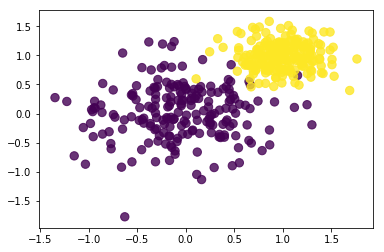

In [3]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')


In [4]:
import numpy as np
import matplotlib.pyplot as plt

def make_dataset(values, n):
    a=np.zeros((5,2))
    np.random.seed(1234429)
    for i in range(len(values)):
        mean=values[i][0]
        width=values[i][1]
        b=width*np.random.randn(n,2)+np.array(mean).reshape(1,2)
        b=np.c_[b, np.ones(n)*i]
        if i==0:
            a=b
        else:
            a=np.append(a,b, axis=0)
    return a


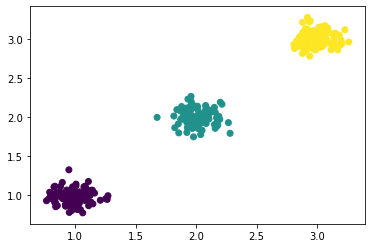

In [5]:
val=[([1,1],0.1), ([2,2],0.1), ([3,3],0.1)] #centers and width

data=make_dataset(val, 100)
#print(data)

plt.scatter(data[:,0], data[:,1],c=data[:,2] )

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should you the `np.load()` function to load the file as a numpy array and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [6]:
! wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

--2020-03-14 14:24:28--  https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.1, 2620:100:6025:1::a27d:4501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/hgnvyj9abatk8g6/residuals_261.npy [following]
--2020-03-14 14:24:29--  https://www.dropbox.com/s/raw/hgnvyj9abatk8g6/residuals_261.npy
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc31b85839e689533cea83514290.dl.dropboxusercontent.com/cd/0/inline/Az4jLk4Wcih3FaiY9uSCow2AjVrbOxc_MiB2QyNljp3COGOc-Ao-pY_z3dawtxWjQd7g-wojHKAtviOJ2a2A_RpeF-bUQZ_8rj2qTnxgoso31Q/file# [following]
--2020-03-14 14:24:29--  https://uc31b85839e689533cea83514290.dl.dropboxusercontent.com/cd/0/inline/Az4jLk4Wcih3FaiY9uSCow2AjVrbOxc_MiB2QyNljp3COGOc-Ao-pY_z3dawtxWjQd7g-wojHKAtviOJ2a2A_RpeF-bUQZ_8rj2qTnxgoso31Q/file
R

slope:  0.0032597701220305835
intercept:  -0.15432816763069473


<ErrorbarContainer object of 3 artists>

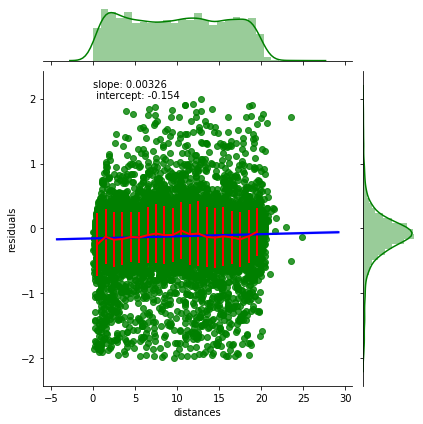

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import scipy as sp

data=np.load("residuals_261.npy", allow_pickle=True)
data=pd.DataFrame(data.item())
data=data[abs(data["residuals"])<2]

slope, intercept, rvalue, pvalue, stderr = scipy.stats.linregress (data["distances"], data["residuals"])
#print(data)
print("slope: ", slope)
print("intercept: ", intercept)

delta=1.
x=np.arange(0,20, delta)+delta/2
tempy=[]
tempz=[]
for center in x:
    b=data[data["distances"]>center-delta/2]
    b=b[b["distances"]<center+delta/2]
    res=np.array(b["residuals"])
    tempy.append(np.mean(res))
    tempz.append(np.std(res))

y=np.array(tempy)
z=np.array(tempz)

import seaborn as sb
sb.jointplot(x="distances", y="residuals", data=data, kind="reg", color="green", joint_kws={'line_kws':{'color':'blue'}})
plt.text(0,2, "slope: "+str(slope.round(5))+"\n intercept: "+str(intercept.round(3)))
plt.errorbar(x,y,yerr=z, label="mean", c="red", linewidth=2)